# Poisson relation  (Blakely, 1996)

In [1]:
# Importing all usefull libraries
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('codes/') 

In [3]:
# Definition for number of points and grid creation
n = 200
x = np.linspace(-3000., 3000., n)
y = np.copy(x)
z = np.random.normal(loc = -100., scale = 1., size = n)
# Creat the grid file
X, Y = np.meshgrid(x, y)

In [4]:
#Informations about the model - sphere
modelmag = [-400., 400., -400., 400., 50., 350.]
modelgrav = [-400., 400., -400., 400., 50., 350.]
# Inclination and declination (source and field
inc, dec = 55., 48.

In [5]:
# Importing modules
from codes import prism, filtering

In [8]:
# Calculating the total field anomaly and the vertical component
tf = prism.prism_tf(X, Y, z, modelmag, 1., inc, dec)
gz = prism.prism_gz(X, Y, z, modelgrav, 1.)

In [9]:
# Applying the reduction to pole
rtp = filtering.reduction(X, Y, tf, inc, dec)

In [10]:
# Computing the pseudogravity anomaly
grav = filtering.pseudograv(X, Y, tf, inc, dec, inc, dec)

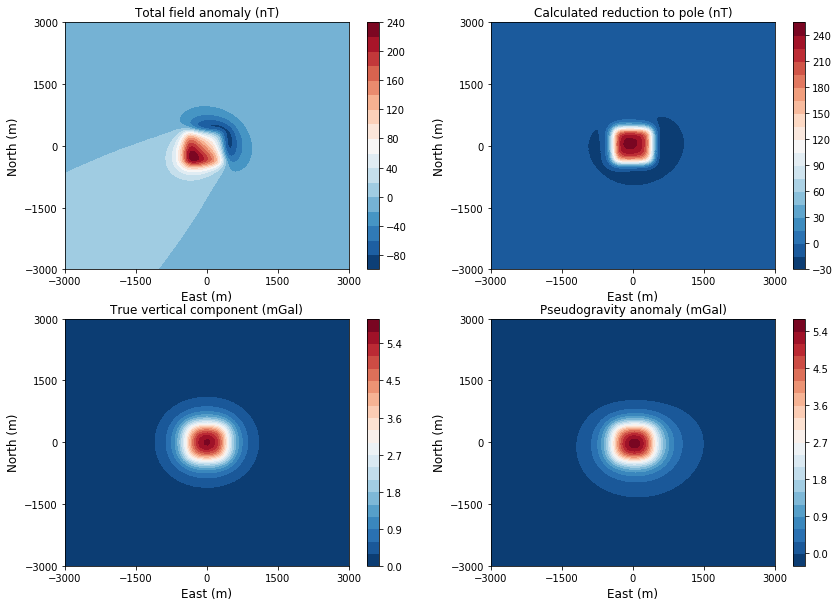

In [11]:
plt.close('all')
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.RdBu_r)
plt.title('Total field anomaly (nT)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, rtp, 20, cmap = plt.cm.RdBu_r)
plt.title('Calculated reduction to pole (nT)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()

plt.subplot(2, 2, 3)
plt.contourf(X, Y, gz, 20, cmap = plt.cm.RdBu_r)
plt.title('True vertical component (mGal)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()
           
plt.subplot(2, 2, 4)
plt.contourf(X, Y, grav, 20, cmap = plt.cm.RdBu_r)
plt.title('Pseudogravity anomaly (mGal)')
plt.xlabel('East (m)', fontsize = 12)
plt.ylabel('North (m)', fontsize = 12)
plt.xticks(np.linspace(x.min(), x.max(), 5))
plt.yticks(np.linspace(y.min(), y.max(), 5))
plt.colorbar()
plt.show()